# Практическая работа 3. Опорно-векторные машины

**Задача: "Классификация текстовых отзывов на положительные и отрицательные с
использованием Опорно-векторных Машин (SVM) и ядер"**

**Описание задачи:** Решить задачу классификации текстовых отзывов, разделяя их на
положительные и отрицательные, с использованием Опорно-векторных Машин (SVM) и
применением ядерной техники для обработки линейно неразделимых классов.

# 1. Загрузка данных:

In [1]:
!kaggle datasets download -d cynthiarempel/amazon-us-customer-reviews-dataset
!unzip amazon-us-customer-reviews-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset
License(s): other
100% 20.9G/21.0G [04:55<00:00, 120MB/s]
100% 21.0G/21.0G [04:55<00:00, 76.2MB/s]
Archive:  amazon-us-customer-reviews-dataset.zip
  inflating: amazon_reviews_multilingual_US_v1_00.tsv  
  inflating: amazon_reviews_us_Apparel_v1_00.tsv  
  inflating: amazon_reviews_us_Automotive_v1_00.tsv  
  inflating: amazon_reviews_us_Baby_v1_00.tsv  
  inflating: amazon_reviews_us_Beauty_v1_00.tsv  
  inflating: amazon_reviews_us_Books_v1_02.tsv  
  inflating: amazon_reviews_us_Camera_v1_00.tsv  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('amazon_reviews_us_Books_v1_02.tsv', sep='\t', on_bad_lines='skip')

In [3]:
df['new'] = np.where(df['star_rating'] > 3, 1, 0)
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,new
0,US,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),Books,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14,1
1,US,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,Books,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14,0
2,US,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",Books,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14,1
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14,1
4,US,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,Books,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14,1


features - будут review_headline и review_body

target - star_rating

можно было для большей объективности внести больший вклад для изменения весов
helpful_votes	и total_votes, которые показывали на сколько отзыв реально полезен

In [4]:
print(df.shape)
df = df.dropna()
df = df[:30002]
print(df.shape)

(3105370, 16)
(30002, 16)


In [5]:
X = np.array(df[['review_headline','review_body']])
y = np.array(df['new'])

In [6]:
X.shape

(30002, 2)

In [7]:
X[0]

array(['this book was a great learning novel!',
       'this boook was a great one that you could learn from. it not only teaches the imponrtance of family and their values but it also deals with basic issues that teens and some kids even deal with.  this book is about 4 best friends who are for the first time in their lives spending their summer apart. one day they are all in one of the girls rooms and finds a pair of pants that were tucked away in her closet.  once all four  of them try them on they realize that there is really something special about these pants.  seeming as how all 4 girls are differnt shapes and sizes and somehow the pants fit all of them,  they realize that these pants were the start of something special.  immediatley following they decided to make up certian rules abut the pants such as you must write the best thing u did while wearing the pants over your summer on the right leg and also some silly things such as to \\\\"never pick yuor nose while wearing the pa

# 2. Предобработка текстовых данных:

Преобразование текстовых данных в числовой формат, например, с использованием
метода TF-IDF для извлечения признаков из текста.

TF-IDF (Частота использования термина - обратная частота использования документа) - это числовая статистика, которая отражает важность слова для документа в коллекции или корпусе. Она часто используется в качестве весового коэффициента при поиске информации и анализе текста.

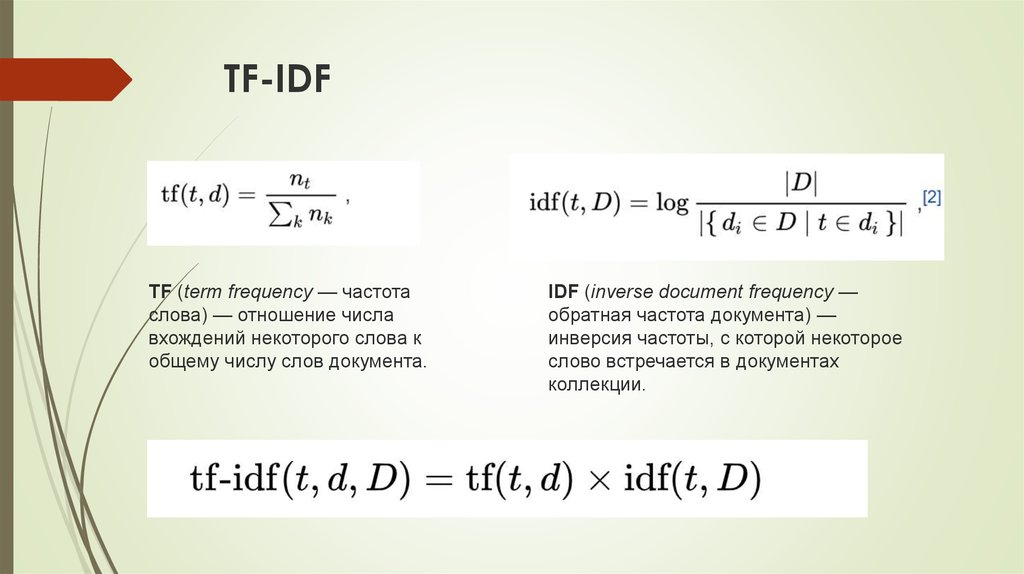

Представим, что мы хотим вычислить TF-IDF для слова "машинное" в первом документе. Давайте предположим, что TF для этого слова равен 1 (поскольку оно встречается 1 раз в данном документе), а IDF можно вычислить как общее количество документов (3) деленное на количество документов, в которых встречается это слово (2). Таким образом, IDF для слова "машинное" равен log(3 / 2) = 0.18.

Теперь мы можем вычислить TF-IDF для слова "машинное" в первом документе: TF-IDF = 1 * 0.18 = 0.18.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_ones = vectorizer.fit_transform(X[:,0])
X_second = vectorizer.fit_transform(X[:,1])

In [9]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_second, y, test_size = 30, random_state=41)

clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
predl = clf_linear.predict(X_test)

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
predr = clf_rbf.predict(X_test)

Оценка производительности модели **linear**

In [11]:
accuracy = accuracy_score(y_test, predl)

precision = precision_score(y_test, predl)
recall = recall_score(y_test, predl)
f1 = f1_score(y_test, predl)


print(f'accuracy: {accuracy}\nprecision: {precision}\nrecall: {recall}\nf1: {f1}')

accuracy: 0.8333333333333334
precision: 0.9090909090909091
recall: 0.8695652173913043
f1: 0.8888888888888888


Оценка производительности модели **радиальнобазисного функционального ядра**

In [12]:
accuracy = accuracy_score(y_test, predr)

precision = precision_score(y_test, predr)

recall = recall_score(y_test, predr)

f1 = f1_score(y_test, predr)

print(f'accuracy: {accuracy}\nprecision: {precision}\nrecall: {recall}\nf1: {f1}')

accuracy: 0.8666666666666667
precision: 0.88
recall: 0.9565217391304348
f1: 0.9166666666666666


Тюнинг параметров SVM:

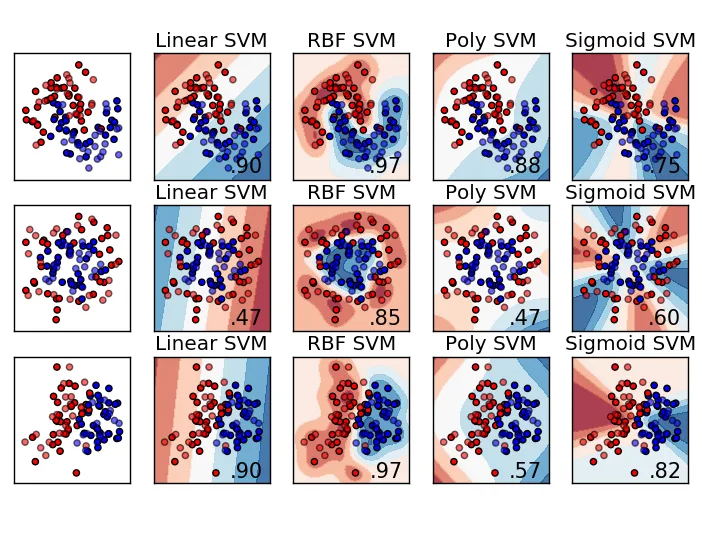

Новая модель на headline(заголовке)

Прошлая модель была на комментарии

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_ones, y, test_size = 30, random_state=41)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('pca', PCA(n_components=100)),
    ('svm', svm.SVC())
])

param_grid = {
    'svm__C': [1,3,5],
    'svm__kernel': ['poly','rbf','sigmoid']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

print(f'Best params:{grid_search.best_params_}\n best f1-score:{grid_search.best_score_}')

Best params:{'svm__C': 1, 'svm__kernel': 'rbf'}
 best f1-score:0.899963448237112


In [16]:
best_models = grid_search.best_estimator_
pred = best_models.predict(X_test)

accuracy = accuracy_score(y_test, pred)

precision = precision_score(y_test, pred)

recall = recall_score(y_test, pred)

f1 = f1_score(y_test, pred)

print(f'accuracy: {accuracy}\nprecision: {precision}\nrecall: {recall}\nf1: {f1}')

accuracy: 0.7666666666666667
precision: 0.7857142857142857
recall: 0.9565217391304348
f1: 0.8627450980392157


Визуализация

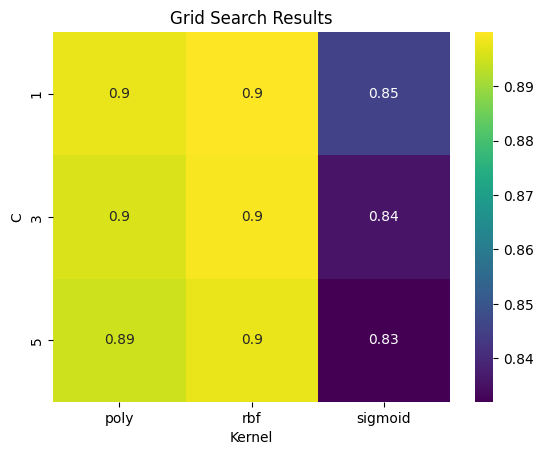

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert the grid search results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Pivot the DataFrame to create a matrix of mean test scores
scores = results.pivot(index='param_svm__C', columns='param_svm__kernel', values='mean_test_score')

# Create a heatmap of the mean test scores
sns.heatmap(scores, annot=True, cmap='viridis')

# Set the plot title and axis labels
plt.title('Grid Search Results')
plt.xlabel('Kernel')
plt.ylabel('C')

# Show the plot
plt.show()

# Сравнение с другими методами:

случайный лес или нейронные сети

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

svm = svm.SVC(kernel='poly', degree=3, coef0=1, C=1)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)
nn_pred = nn.predict(X_test)

print('SVM Classification Report:')
print(classification_report(y_test, svm_pred))
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_pred))
print('Neural Network Classification Report:')
print(classification_report(y_test, nn_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.75      0.91      0.82        23

    accuracy                           0.70        30
   macro avg       0.38      0.46      0.41        30
weighted avg       0.57      0.70      0.63        30

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.76      0.96      0.85        23

    accuracy                           0.73        30
   macro avg       0.38      0.48      0.42        30
weighted avg       0.58      0.73      0.65        30

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.80      0.87      0.83        23

    accuracy                           0.73        30
   macro avg       0.60   

# Выводы:

при нелинейном SVM мы имеем хороший recal, то есть мы действительно хорошо угадываем положительные комментарии из положительных.

В линейном виде хороший precision, это означает что мы правильно угадываем 90% хороших комментариев из 100%

In [19]:
from collections import Counter

Counter(y)

Counter({1: 23970, 0: 6032})

Мы переобучили 1 класс =). В следующий раз буду внимательнее